# LON PROJECTION PATTERNS

check later. something buggy regarding lon projs. converted to snap and suddenly slices project everywhere

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from bluepysnap import Circuit
import os
from scipy import sparse

In [5]:
dpi=300
file_format = 'png'
fig_save_dir = f'{os.getcwd()}/output/'

In [6]:
CIRCUIT_DIR = '/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/'
c = Circuit(f'{CIRCUIT_DIR}/sonata/circuit_config.json')
nodes = c.nodes['hippocampus_neurons']

In [15]:
adj_path = '/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/data/ca1_synaptome.npz'
adj = sparse.load_npz(adj_path)

In [26]:
targets = [i for i in c.node_sets.content.keys() if i.startswith('slice') and not i.endswith('400um') ]

In [27]:
slice_by_gid = np.zeros(nodes.count()) -1 
for target in targets:
    slice_index = int(target[5:])
    for slice_gids in nodes.ids(target):
        slice_by_gid[slice_gids-1] = slice_index

In [31]:
len(np.where(slice_by_gid==-1)[0])

157

Text(0.5, 1.0, 'Num Connections')

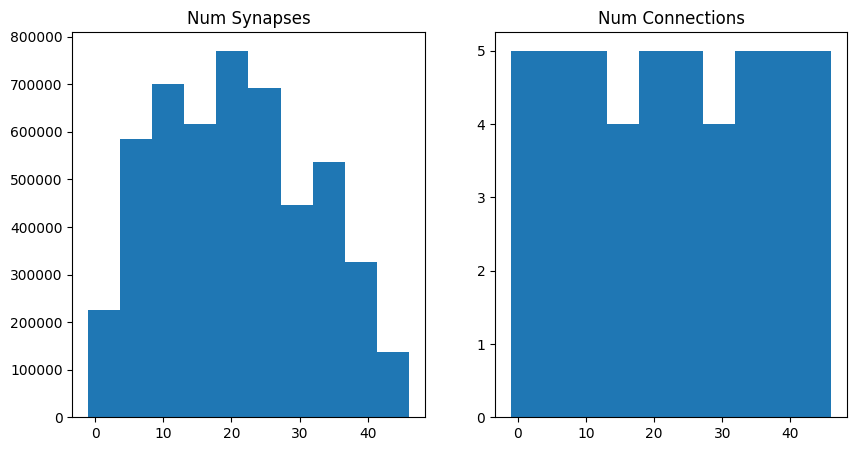

In [45]:
target = 'slice20'
sel_indices = nodes.ids(group=target)
sub_adjacency_matrix = adj[sel_indices]
post_ind=sub_adjacency_matrix.nonzero()[1]
slice_by_post_ind = slice_by_gid[post_ind]
f=plt.subplots(ncols=2,nrows=1,figsize=(10,5))
plt.subplot(121)
plt.hist(slice_by_post_ind)
plt.title('Num Synapses')
plt.subplot(122)
plt.hist(np.unique(slice_by_post_ind))
plt.title('Num Connections')

In [46]:
slice_by_post_ind

array([29.,  7., 34., ...,  5., 25., 32.])

In [34]:
sel_indices.shape

(14085,)

In [35]:
sub_adjacency_matrix

<14085x456378 sparse matrix of type '<class 'numpy.float64'>'
	with 5038092 stored elements in Compressed Sparse Column format>

In [40]:
np.unique(post_ind).shape

(57936,)

In [36]:
post_ind.spost_ind

(5038092,)

In [7]:
def find_slices(dictionary, gid_list):
    result = []
    for gid in gid_list:
        for slice_name, gids in dictionary.items():
            if gid in gids:
                result.append(slice_name)
                break
        else:
            result.append(np.nan)  # GID not found in any slice
    return np.array(result)

In [8]:
slice_dict = {target: c.cells.ids(target) for target in targets}

NameError: name 'targets' is not defined

In [9]:
for key,values in slice_dict.items():
    if 1734 in values:
        print(key)

NameError: name 'slice_dict' is not defined

In [30]:
slice_contribution_eff = find_slices(slice_dict,c.connectome.efferent_gids(1734))

(array([  1.,   0., 173.,   0.,   0.,   6.,   0.,  45.,   0.,   1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

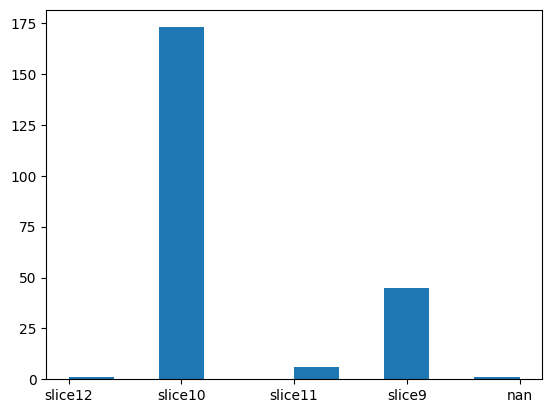

In [31]:
plt.hist(slice_contribution_eff)

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def plot_normalized_histogram(dictionary, gid_list):
    result = find_slices(dictionary, gid_list)
    
    # Count the occurrences of each slice
    slice_names, slice_counts = np.unique(result, return_counts=True)
    
    # Normalize the counts
    total_slices = len(result)
    normalized_counts = {slice_name: count / total_slices for slice_name, count in zip(slice_names, slice_counts)}
    
    # Plot the histogram
    plt.bar(normalized_counts.keys(), normalized_counts.values())
    plt.ylabel('Normalized Frequency')
    plt.title('Normalized Histogram of Slice-GID Mapping')
    plt.show()


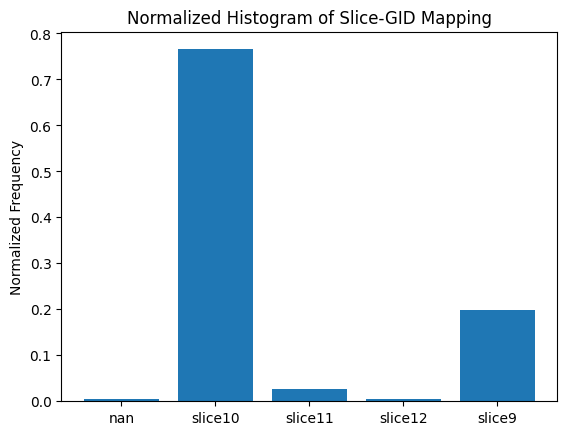

In [33]:
plot_normalized_histogram(slice_dict,c.connectome.efferent_gids(1734))

In [34]:
sel_indices = c.cells.ids('slice10') - 1

In [35]:
sub_adjacency_matrix = adj[sel_indices]

In [36]:
sub_adjacency_matrix 

<12615x456378 sparse matrix of type '<class 'numpy.float64'>'
	with 4391046 stored elements in Compressed Sparse Column format>

In [37]:
_, post_indices = sub_adjacency_matrix.nonzero()

In [38]:
post_indices

array([  1383,   2124,   3343, ..., 456147, 456312, 456357], dtype=int32)

In [53]:
post_mtypes = c.cells.get(post_indices+1).mtype.to_frame()

In [57]:
mtype, counts = np.unique(post_mtypes.mtype.values,return_counts=True)

<BarContainer object of 12 artists>

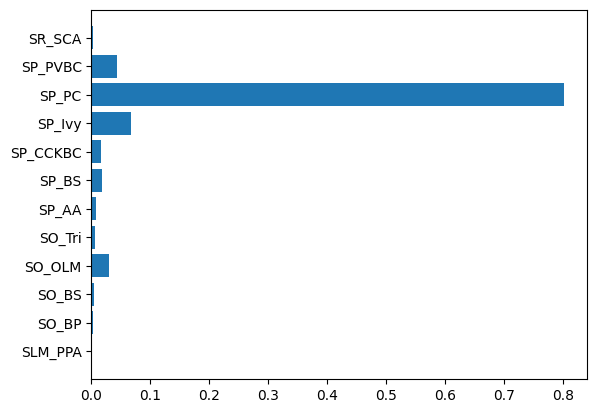

In [60]:
counts = counts / counts.sum()
plt.barh(mtype,counts)

In [172]:
nodes.count()

456378

In [171]:
slice_by_gid = np.zeros(c.cells.count()) -1 
for target in targets:
    slice_index = int(target[5:])
    for slice_gids in nodes.ids(target):
        slice_by_gid[slice_gids-1] = slice_index

AttributeError: 'Circuit' object has no attribute 'cells'

In [78]:
np.where(slice_by_gid==-1)[0].shape

(157,)

In [79]:
post_indices

array([  1383,   2124,   3343, ..., 456147, 456312, 456357], dtype=int32)

Text(0, 0.5, 'Num Connections')

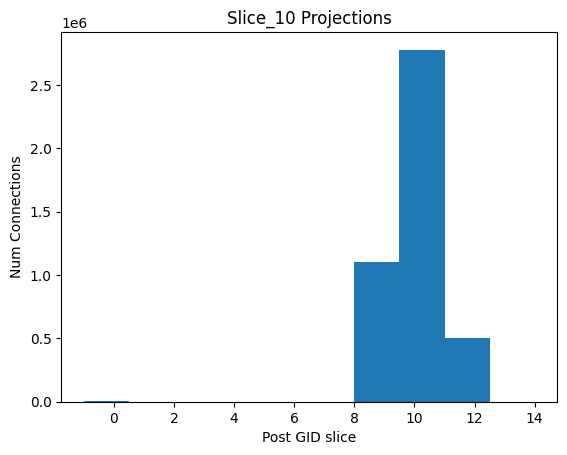

In [84]:
plt.hist(slice_by_gid[post_indices])
plt.title('Slice_10 Projections')
plt.xlabel('Post GID slice')
plt.ylabel('Num Connections')

In [10]:
def plot_target_slice_efferents(target:str,cell_type=False,**kwargs):
    if not isinstance(target,str):
        raise ValueError
    if cell_type:
        sel_ind = nodes.ids(target)
    else:
        sel_ind = nodes.ids(target)
    sub_adjacency_matrix = adj[sel_ind]
    _, post_ind = sub_adjacency_matrix.nonzero()
    plt.hist(slice_by_gid[post_ind],**kwargs)
    plt.title(f'{target} Projections')
    plt.xlabel('Post GID slice')
    plt.ylabel('Num Edges')
    
#     most_freq = mode(slice_by_gid[post_ind]).mode[0].astype(int)
#     plt.xticks(np.arange(most_freq-4,most_freq+4))

In [11]:
post_ind.shape

NameError: name 'post_ind' is not defined

In [199]:
slice_by_gid[post_ind].shape

(5038092,)

In [12]:
target = 'slice20'
sel_indices = nodes.ids(group=target)
sub_adjacency_matrix = adj[sel_indices]
post_ind=sub_adjacency_matrix.nonzero()[1]
slice_by_post_ind = slice_by_gid[post_ind]
plt.hist(slice_by_post_ind)

NameError: name 'adj' is not defined

(array([226354., 585422., 700578., 617152., 770874., 691356., 447045.,
        535789., 325723., 137799.]),
 array([-1. ,  3.7,  8.4, 13.1, 17.8, 22.5, 27.2, 31.9, 36.6, 41.3, 46. ]),
 <BarContainer object of 10 artists>)

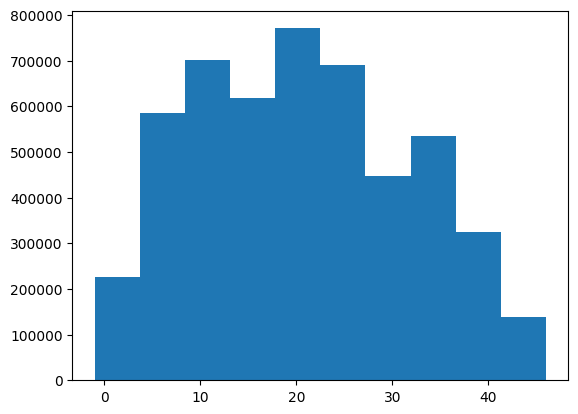

In [209]:
target = 'slice20'
sel_indices = bluepyc.cells.ids(group=target) -1
sub_adjacency_matrix = adj[sel_indices]
post_ind=sub_adjacency_matrix.nonzero()[1]
slice_by_post_ind = slice_by_gid[post_ind]
plt.hist(slice_by_post_ind)

In [161]:
np.unique(slice_by_post_ind,return_counts=True)

(array([-1., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 array([   5531,      13,     913,   21884,  917598, 3435531,  640046,
          15873,     694,       9]))

In [169]:
slice_by_post_ind.shape

(5038092,)

In [190]:
post_ind.shape

(5038092,)

In [166]:
np.unique(slice_by_gid,return_counts=True)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
        12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.,
        25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37.,
        38., 39., 40., 41., 42., 43., 44., 45., 46.]),
 array([  157,   488,  5425,  7571,  6703,  6896,  8541, 11555, 13082,
        14088, 13627, 12615, 12470, 12751, 12349, 12606, 14435, 14834,
        14579, 14614, 14766, 14085, 13489, 12887, 12718, 12155, 12021,
        12616, 12746, 11142,  9703,  8929,  9405,  9587,  9788,  9462,
         9211,  9894,  8081,  6157,  5225,  5316,  5372,  4917,  3860,
         2471,   972,    17]))

In [182]:
slice_by_gid.shape

(456378,)

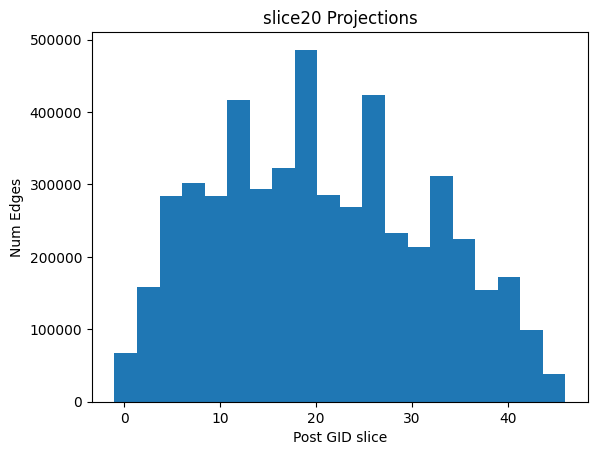

In [202]:
plot_target_slice_efferents('slice20',bins=20)
plt.yscale('log')

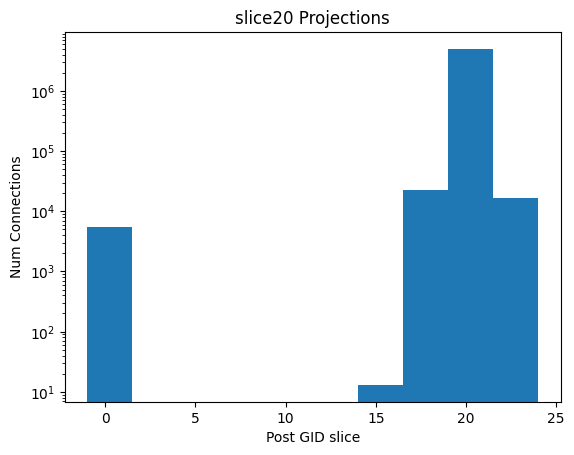

In [129]:
plot_target_slice_efferents('slice20')
plt.yscale('log')

In [99]:
isinstance(333,str)

False

In [118]:
from scipy.stats import mode

mode(slice_by_gid[post_indices]).mode[0].astype(int)

/gpfs/bbp.cscs.ch/ssd/slurmTmpFS/kurban/1609211/ipykernel_49961/766564902.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode(slice_by_gid[post_indices]).mode[0].astype(int)


10